In [1]:
from rdkit import Chem
from rdkit.Chem import rdFMCS, Descriptors, AllChem

In [94]:
def create_reaction(reactant, product):
    mols = [Chem.MolFromSmiles(sm) for sm in (reactant, product)]
    mcs = rdFMCS.FindMCS(mols).queryMol
    matches = [mol.GetSubstructMatch(mcs) for mol in mols]
    map_count = 1
    for atoms_idx in zip(*matches):
        for mol, idx in zip(mols, atoms_idx):
            atom = mol.GetAtomWithIdx(idx)
            atom.SetAtomMapNum(map_count)
        map_count +=1
    mols_smarts = [Chem.MolToSmarts(mol) for mol in mols]
    return AllChem.ReactionFromSmarts('>>'.join(mols_smarts))


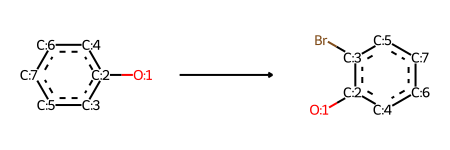

In [95]:
rxn = create_reaction("Oc1ccccc1", "Oc1c(Br)cccc1")
rxn

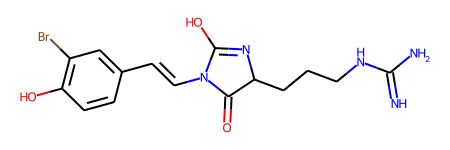

In [96]:
pz = Chem.MolFromSmiles("[H]\C(=C(\[H])C1=CC=C(O)C=C1)N1C(O)=NC(CCCNC(N)=N)C1=O")
pz
rxn.RunReactants((pz,))[0][0]

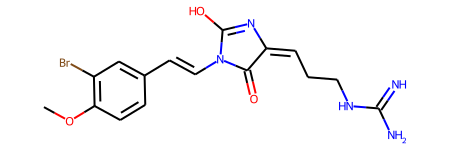

In [97]:
pz = Chem.MolFromSmiles("[H]\C(CCNC(N)=N)=C1/N=C(O)N(\C([H])=C(/[H])C2=CC=C(OC)C=C2)C1=O")
pz
rxn.RunReactants((pz,))[0][0]

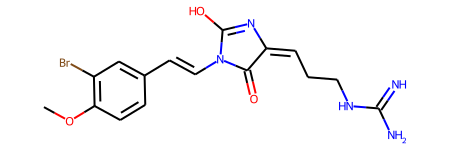

In [98]:
rxn.RunReactants((pz,))[1][0]

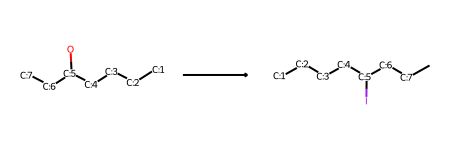

In [24]:
create_reaction("CCCCC(O)CC", "CCCCC(I)CCC")

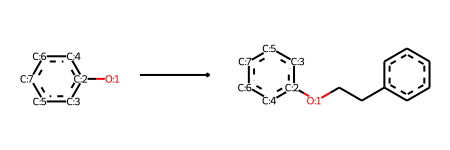

In [25]:
create_reaction("OC1=CC=CC=C1", "C(CC1=CC=CC=C1)OC1=CC=CC=C1")